"""
    DataEnhance.py
      ~~~~~

    @Author  : lijinhao
    @copyright: (c) 2021, Scau
    @date created: 2021/11/21 20:40
    @python version: 2.7
    数据增强指的是：
        1. 对图片进行一定比例缩放
        2. 对图片进行随机位置的截取
        3. 对图片进行随机的水平和竖直翻转
        4. 对图片进行随机角度的旋转
        5. 对图片进行亮度、对比度和颜色的随机变化
    数据增强的意义：
        1. 数据集太小，造数据
        2. 增强模型鲁棒性
"""

这些方法 pytorch 为我们内置在了 torchvision 里面

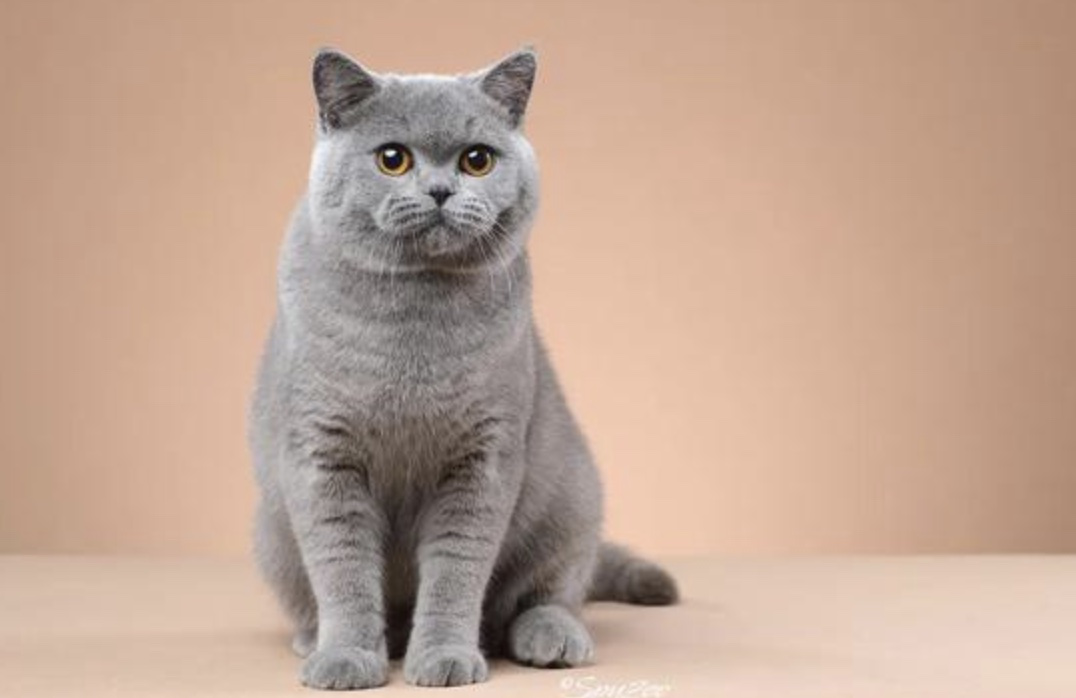

In [4]:
import sys
sys.path.append('..')

from PIL import Image
from torchvision import transforms as tfs

# 读入一张图片
im = Image.open('./data/cat.jpg')
im

## 随机比例放缩
`torchvision.transforms.Resize(size, interpolation=2)`

In [ ]:
'''
    size (sequence or int) – 所需的输出大小。 如果 size 是像 (h, w) 这样的序列，则输出大小将与此匹配。 
    如果 size 是 int，则图像的较小边缘将与此数字匹配。 
    即如果高度宽度，则图像将被重新缩放为（大小*高度/宽度，大小）

    插值（int，可选）– 所需的插值。 默认为 PIL.Image.BILINEAR 一共有4中的插值方法
    Image.BICUBIC，PIL.Image.LANCZOS，PIL.Image.BILINEAR，PIL.Image.NEAREST
'''

before scale, shape: (1076, 698)
after scale, shape: (200, 100)


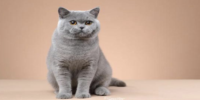

In [7]:
# 比例缩放
print('before scale, shape: {}'.format(im.size))
new_im = tfs.Resize((100, 200))(im)
print('after scale, shape: {}'.format(new_im.size))
new_im

## 随机位置截取
1. 随机裁剪   
`torchvision.transforms.RandomCrop（size，padding = None，pad_if_needed = False，fill = 0，padding_mode ='constant'）
`

传入的参数就是截取出的图片的长和宽，对图片在随机位置进行截取
- size（sequence 或int） - 作物的所需输出大小。如果size是int而不是像（h，w）这样的序列，则进行正方形裁剪（大小，大小）
- padding（int或sequence ，optional） - 图像每个边框上的可选填充。默认值为None，即无填充。如果提供长度为4的序列，则它用于分别填充左，上，右，下边界。如果提供长度为2的序列，则分别用于填充左/右，上/下边界
- pad_if_needed（boolean） - 如果小于所需大小，它将填充图像以避免引发异常。由于在填充之后完成裁剪，因此填充似乎是在随机偏移处完成的。
- fill - 恒定填充的像素填充值。默认值为0.如果长度为3的元组，则分别用于填充R，G，B通道。仅当padding_mode为常量时才使用此值.
- padding_mode-填充类型。应该是：恒定，边缘，反射或对称。默认值是常量。常量：具有常量值的焊盘，该值用填充指定
    - edge：填充图像边缘的最后一个值
    - 反射：具有图像反射的垫（不重复边缘上的最后一个值）,填充[1,2,3,4]在反射模式下两侧有2个元素将导致[3,2,1,2,3,4,3,2]
    - 对称：具有图像反射的垫（重复边缘上的最后一个值）,填充[1,2,3,4]在对称模式下两侧有2个元素将导致[2,1,1,2,3,4,4,3]

2. 中心裁剪  
`torchvision.transforms.CenterCrop(size)`  
传入的图片的大小作为参数，会在图片的中心进行截取
- 依据给定的size从中心裁剪 参数： size- (sequence or int)，若为sequence,则为(h,w)，若为int，则(size,size)

3. 随机长宽比裁剪  
`torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=2)`  
将给定的PIL图像裁剪为随机大小和宽高比。
将原始图像大小变成随机大小（默认值：是原始图像的0.08到1.0倍）和随机宽高比（默认值：3/4到4/3倍）。这种方法最终调整到适当的大小。这通常用于训练Inception网络。

- size - 每条边的预期输出大小
- scale - 裁剪的原始尺寸的大小范围
- ratio - 裁剪的原始宽高比的宽高比范围
- interpolation - 默认值：PIL.Image.BILINEAR

4. 上下左右中心裁剪  
`torchvision.transforms.FiveCrop(size)`


5. 上下左右中心裁剪后翻转
`torchvision.transforms.TenCrop(size, vertical_flip=False)`  
将给定的PIL图像裁剪为四个角，中央裁剪加上这些的翻转版本（默认使用水平翻转）。
此转换返回图像元组，并且数据集返回的输入和目标数量可能不匹配。

- size（sequence 或int） -作物的所需输出大小。如果size是int而不是像（h，w）这样的序列，则进行正方形裁剪（大小，大小）。
- vertical_flip（bool） - 使用垂直翻转而不是水平翻转

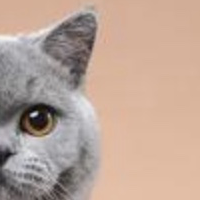

In [18]:
# 随机裁剪出 100 x 100 的区域
random_im1 = tfs.RandomCrop(200)(im)
random_im1

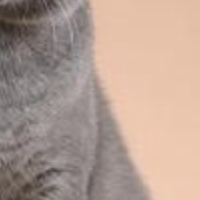

In [22]:
# 中心裁剪出 100 x 100 的区域
center_im = tfs.CenterCrop(200)(im)
center_im

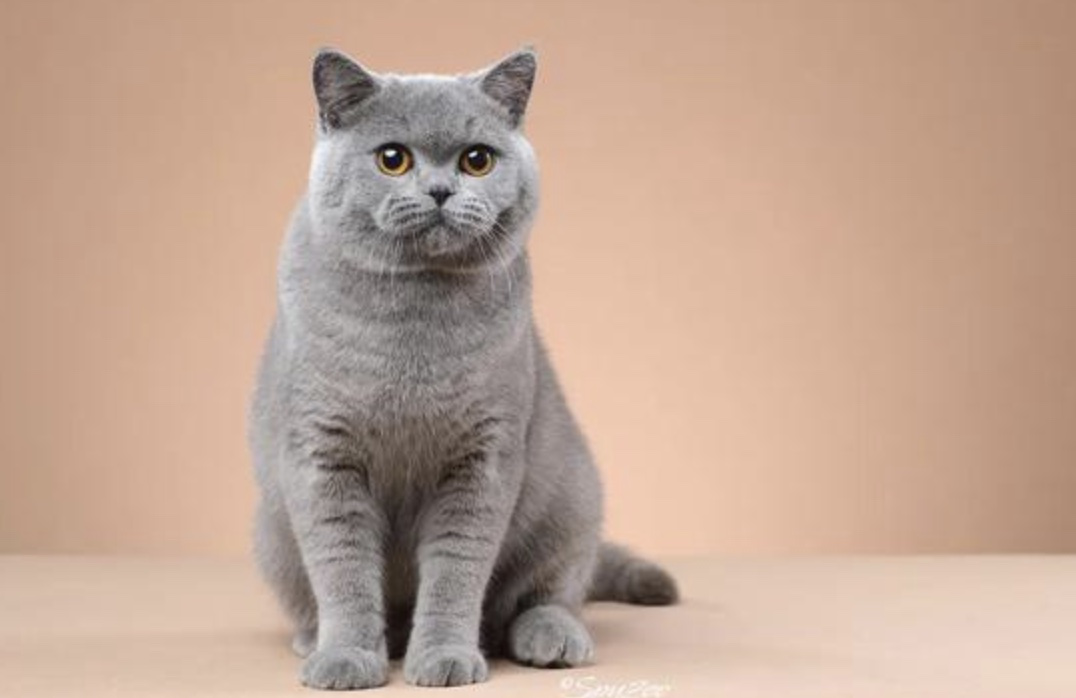

In [23]:
# 随机水平翻转
h_filp = tfs.RandomHorizontalFlip()(im)
h_filp

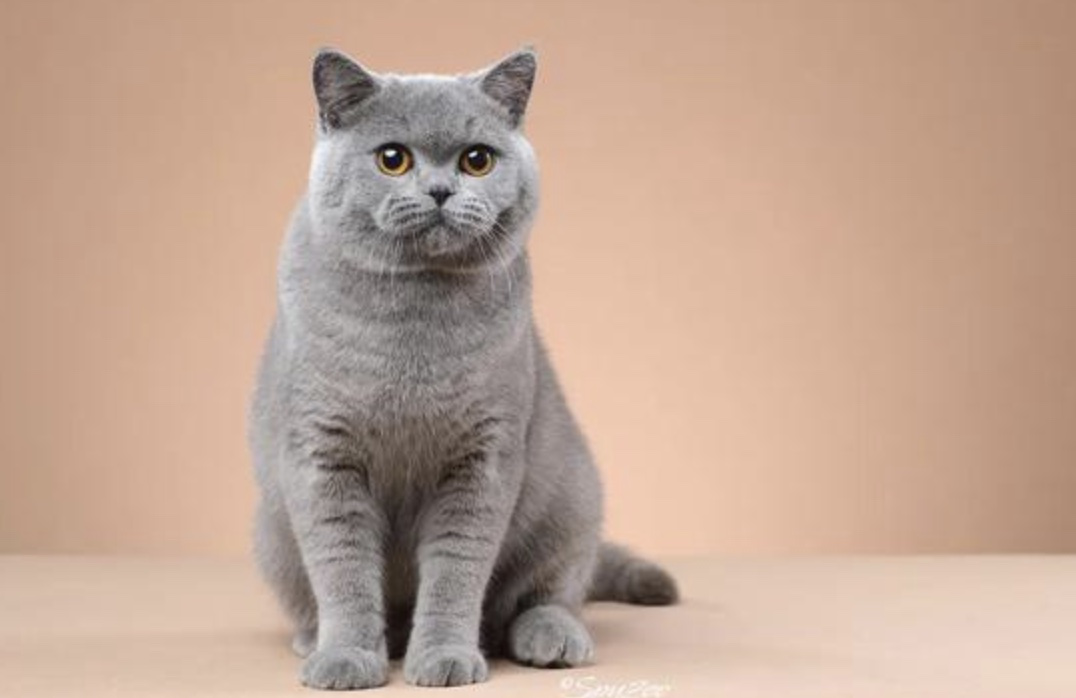

In [25]:
# 随机竖直翻转
v_flip = tfs.RandomVerticalFlip()(im)
v_flip

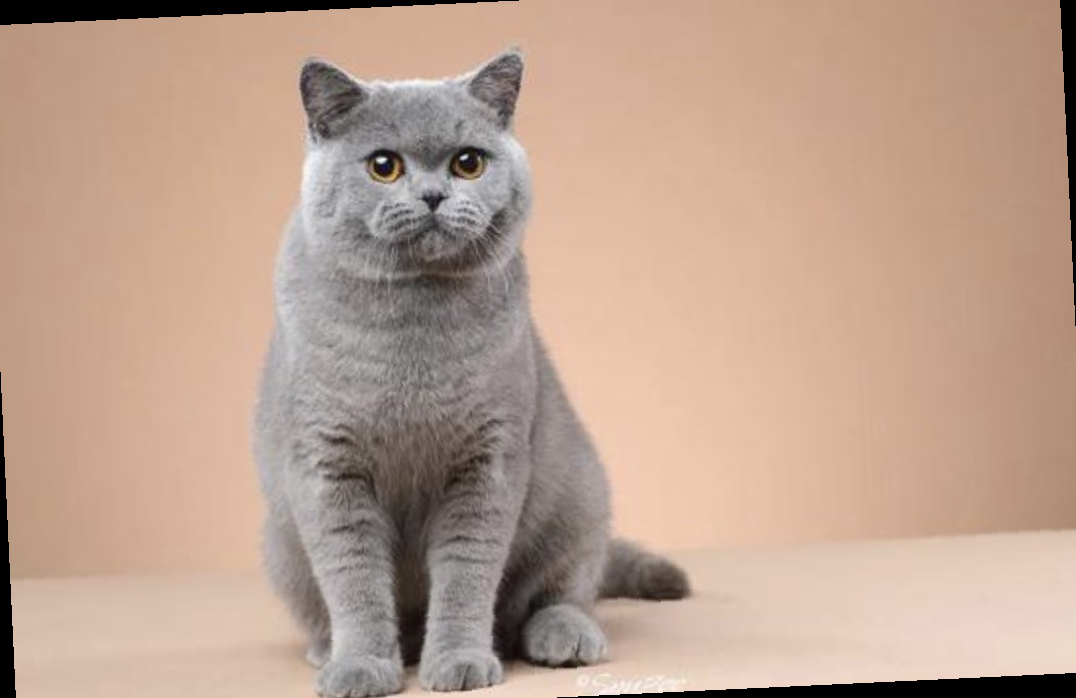

In [26]:
# 随机角度旋转
rot_im = tfs.RandomRotation(45)(im)
rot_im

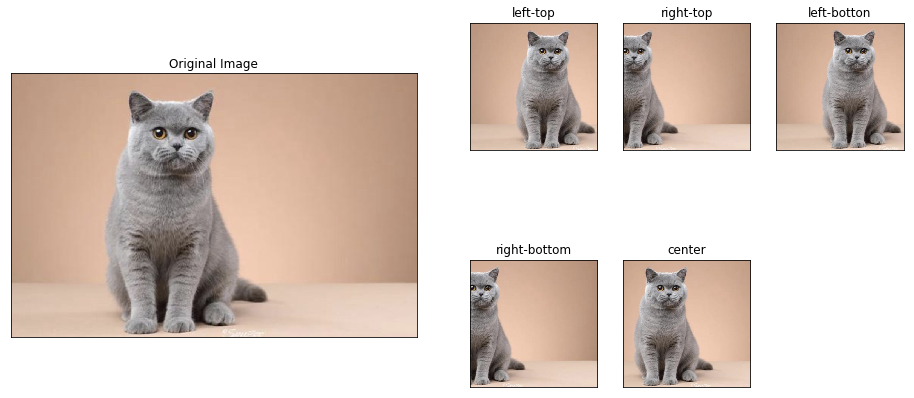

In [41]:
"""
Descriptions:
  FiveCrop操作将产生5张图像,分别对应左上角、右上角、左下角、右下角和中心
"""
from torchvision import transforms 
img_path = r'./data/cat.jpg'

img = Image.open(img_path)

imgs = transforms.FiveCrop(696)(img)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
img = np.array(img)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Original Image')

crop_title = ['left-top', 'right-top', 'left-botton', 'right-bottom', 'center']
for i, im in enumerate(imgs):
    plt.subplot(2, 6, (i // 3) * 3 + 4 + i)
    plt.imshow(np.array(im), )
    plt.title(crop_title[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

上下左右中心及其镜像裁剪： TenCrop(size, vertical_flip=False)
与FiveCrop类似，TenCrop将会得到10张图片，分别是4个角和中心区域的裁剪，以及它们的镜像(默认是水平镜像)。

## 亮度、对比度和颜色的变化

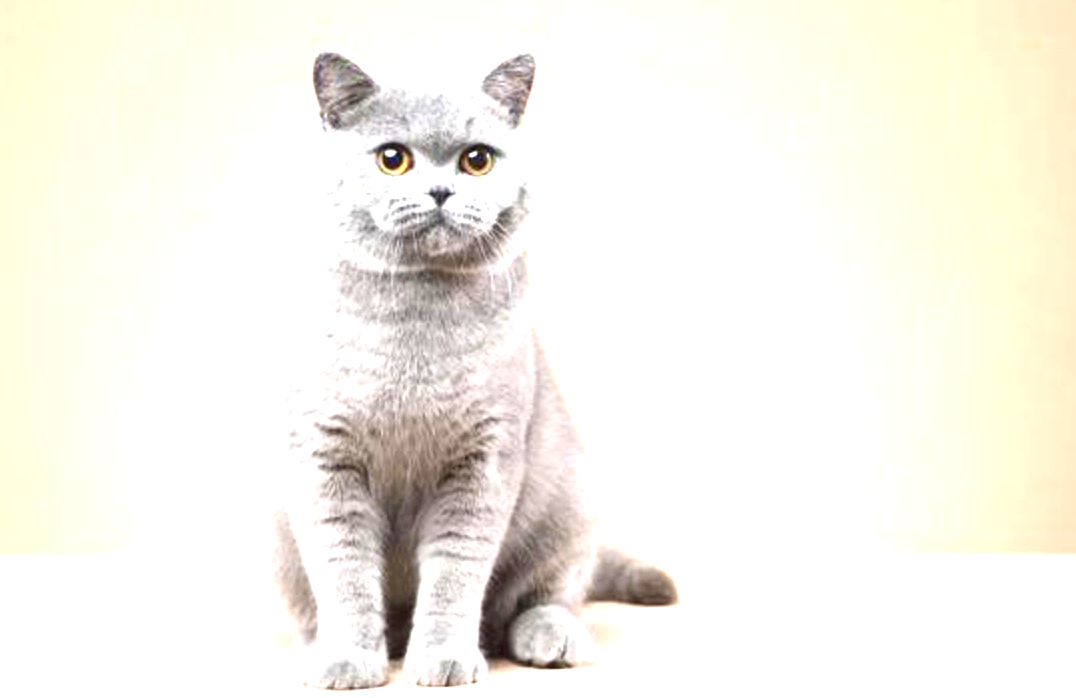

In [28]:
# 亮度
bright_im = tfs.ColorJitter(brightness=1)(im) # 随机从 0 ~ 2 之间亮度变化，1 表示原图
bright_im

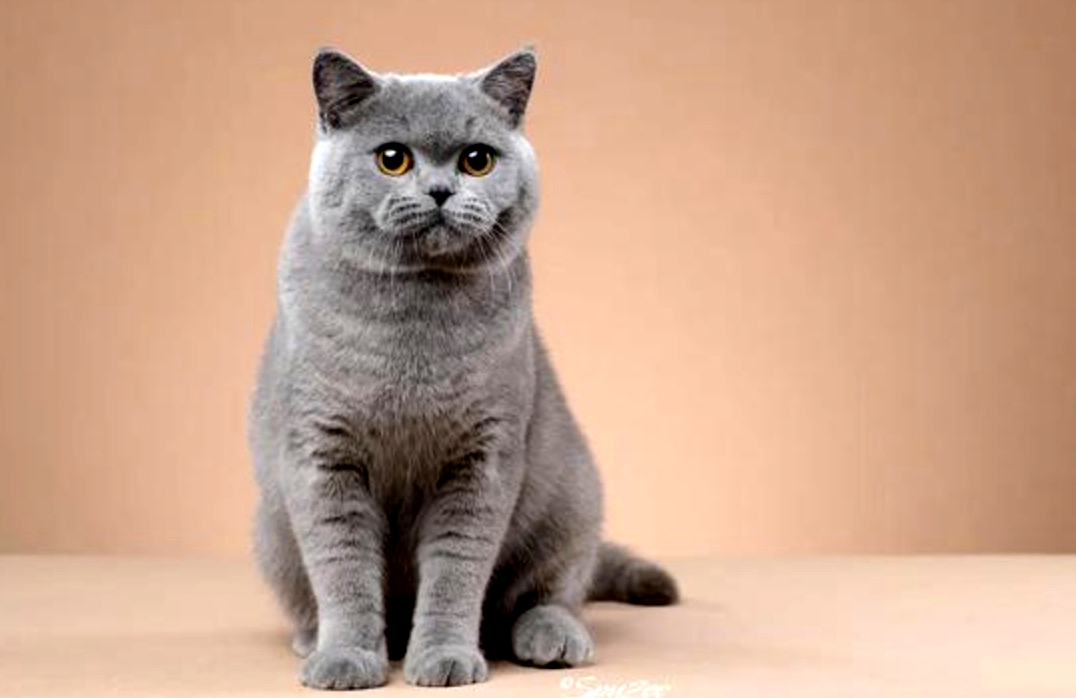

In [29]:
# 对比度
contrast_im = tfs.ColorJitter(contrast=1)(im) # 随机从 0 ~ 2 之间对比度变化，1 表示原图
contrast_im

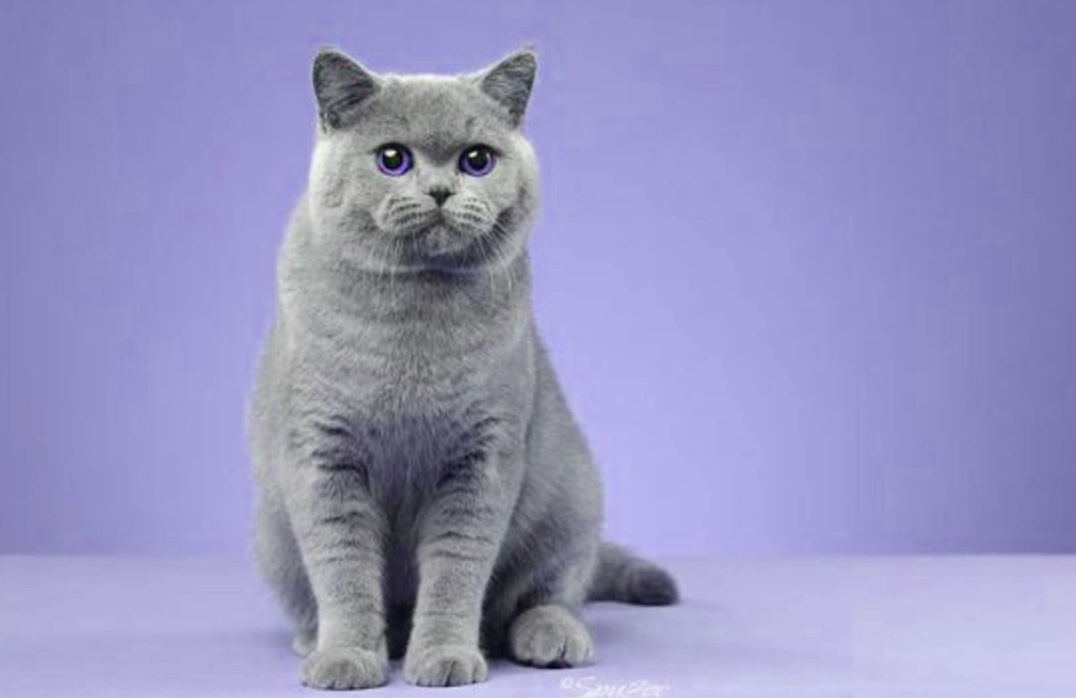

In [30]:
# 颜色
color_im = tfs.ColorJitter(hue=0.5)(im) # 随机从 -0.5 ~ 0.5 之间对颜色变化
color_im

上面我们讲了这么图片增强的方法，其实这些方法都不是孤立起来用的，可以联合起来用，比如先做随机翻转，然后随机截取，再做对比度增强等等，torchvision 里面有个非常方便的函数能够将这些变化合起来，就是:

`torchvision.transforms.Compose()`

In [31]:
im_aug = tfs.Compose([
  tfs.Resize(120),
  tfs.RandomHorizontalFlip(),
  tfs.RandomCrop(96),
  tfs.ColorJitter(brightness=0.5, contrast=0.5, hue=0.5)
])

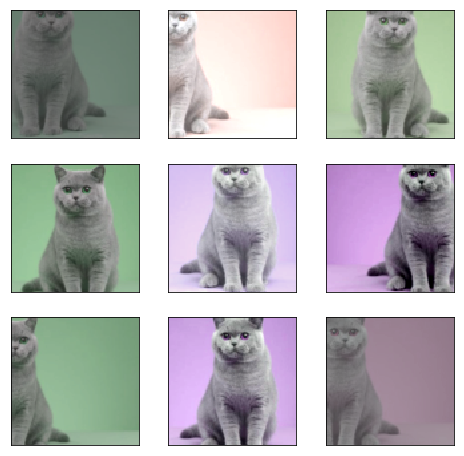

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 3
ncols = 3
figsize = (8, 8)
_, figs = plt.subplots(nrows, ncols, figsize=figsize)
for i in range(nrows):
    for j in range(ncols):
        figs[i][j].imshow(im_aug(im))
        figs[i][j].axes.get_xaxis().set_visible(False)
        figs[i][j].axes.get_yaxis().set_visible(False)
plt.show()

使用数据增强进行训练的时候，准确率会比不使用更高，因为数据增强提高了模型应对于更多的不同数据集的泛化能力，所以有更好的效果。